# Formulation of the HFMDCVRP (Multi Depot Heterogeneous Fleet CVRP)

Packages importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import *
import pandas as pd

Data importation:

In [2]:
cmoto = np.loadtxt("distmoto.txt")
cvan = np.loadtxt("distvan.txt")
ccamion = np.loadtxt("distcamion.txt")

In [3]:
# Number of vehicles
Vehic = 6

# Number of clients
Clients = 12

# Big M
M = 100

# Number of depots
Depots = 2

Sets

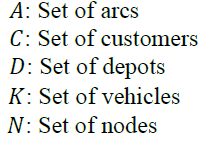

In [4]:
N = [i for i in range(Clients+Depots)] # Set of nodes
C = [i for i in range(Depots,Clients+Depots)]
A = [(i,j) for i in N for j in N]
K = [i for i in range(Vehic)]
D = [i for i in range(Depots)]

Getting the demand of every customer:

In [5]:
demand = np.loadtxt("demand.txt")
d = {i: demand[i] for i in C}

Capacity of each depot

In [6]:
R = [40,40]

Setting the distance matrix for every vehicle:

In [7]:
c = np.zeros([Clients+Depots,Clients+Depots,Vehic])
c[:,:,0]=cmoto
c[:,:,1]=cmoto
c[:,:,2]=cvan
c[:,:,3]=cvan
c[:,:,4]=ccamion
c[:,:,5]=ccamion

Final parameter, the capacity of each vehicle

In [8]:
capacidad = np.loadtxt("cap.txt")
q = {i: capacidad[i] for i in K}

In [9]:
# Call the model
m = Model("HFMDVRP")
m.setParam("TimeLimit",60)

Academic license - for non-commercial use only - expires 2021-04-09
Using license file C:\Users\57316\gurobi.lic
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf


Variables:

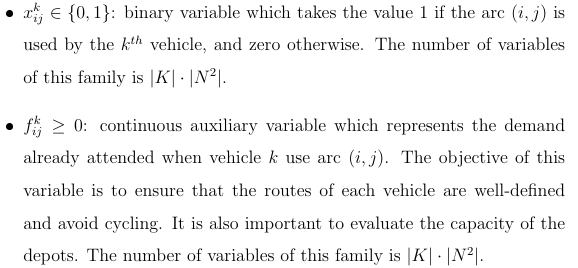
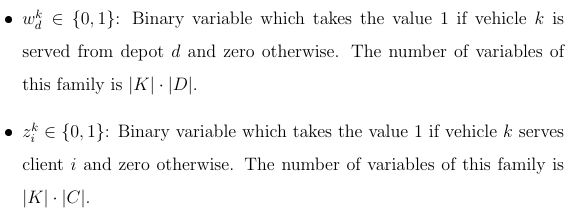

In [10]:
x = m.addVars(A,K,vtype=GRB.BINARY,name="x")
f = m.addVars(A,K,vtype=GRB.CONTINUOUS,lb=0,name="f")
w = m.addVars(D,K,vtype=GRB.BINARY,name="w")
z = m.addVars(C,K,vtype=GRB.BINARY,name="z")

Objective function

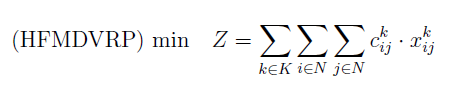

In [11]:
m.modelSense = GRB.MINIMIZE
m.setObjective(quicksum(c[i,j,k]*x[i,j,k] for i,j in A for k in K))

# Constraints

Every client must be visited once

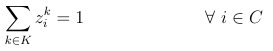

In [12]:
m.addConstrs(quicksum(z[i,k] for k in K)==1 for i in C);

The demand served by a vehicle must be less than its capacity

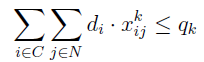

In [13]:
m.addConstrs(quicksum(d[i]*x[i,j,k] for i in C for j in N)<=q[k] for k in K);

Vehicles must start the route at the depot assigned to it

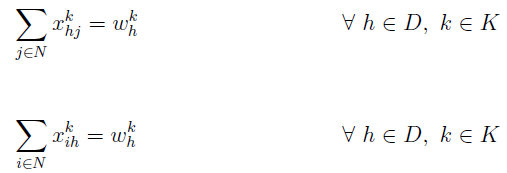

In [14]:
m.addConstrs(quicksum(x[h,j,k] for j in N)==w[h,k] for k in K for h in D);
m.addConstrs(quicksum(x[i,h,k] for i in N)==w[h,k] for k in K for h in D);

Flow constraint

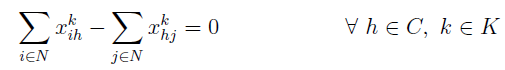

In [15]:
m.addConstrs(quicksum(x[i,h,k] for i in N)-quicksum(x[h,j,k] for j in N)==0 for k in K for h in C);

Load constraints

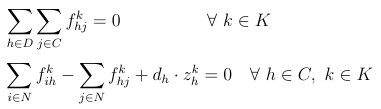

In [16]:
m.addConstrs(quicksum(f[h,j,k] for h in D for j in C) == 0 for k in K);
m.addConstrs(quicksum(f[i,h,k] for i in N) - quicksum(f[h,j,k] for j in N) + d[h]*z[h,k] == 0 for h in C for k in K);

Depot capacity

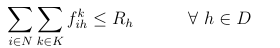

In [17]:
m.addConstrs(quicksum(f[i,h,k] for i in N for k in K) <= R[h] for h in D);

Upper bound of variable f

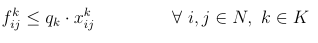

In [18]:
m.addConstrs(f[i,j,k] <= q[k]*x[i,j,k] for i in N for j in N for k in K);

In [19]:
m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1370 rows, 2436 columns and 7920 nonzeros
Model fingerprint: 0xf2b1aeae
Variable types: 1176 continuous, 1260 integer (1260 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [8e+00, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 254 rows and 340 columns
Presolve time: 0.03s
Presolved: 1116 rows, 2096 columns, 6976 nonzeros
Variable types: 928 continuous, 1168 integer (1168 binary)

Root relaxation: objective 6.454095e+03, 1420 iterations, 0.03 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 6454.09500    0   30          - 6454.09500      -     -    0s
H    0     0                    30051.750000 6454.09500  78.5%     -    0s
H    0   

In [20]:
m.printAttr("X")


    Variable            X 
-------------------------
    x[0,0,1]            1 
    x[0,0,2]            1 
    x[0,0,4]            1 
    x[0,8,5]            1 
    x[1,1,1]            1 
    x[1,1,4]            1 
   x[1,11,3]            1 
   x[1,12,0]            1 
    x[2,3,5]            1 
    x[3,4,5]            1 
    x[4,0,5]            1 
    x[5,7,3]            1 
    x[6,2,5]            1 
    x[7,1,3]            1 
    x[8,6,5]            1 
    x[9,5,3]            1 
   x[10,1,0]            1 
   x[11,9,3]            1 
  x[12,13,0]            1 
  x[13,10,0]            1 
    f[2,3,5]           16 
    f[3,4,5]           21 
    f[4,0,5]           27 
    f[5,7,3]           15 
    f[6,2,5]            9 
    f[7,1,3]           20 
    f[8,6,5]            4 
    f[9,5,3]           11 
   f[10,1,0]           12 
   f[11,9,3]            6 
  f[12,13,0]            4 
  f[13,10,0]            7 
      w[0,1]            1 
      w[0,2]            1 
      w[0,4]            1 
 